# Лабораторная работа №2

## Векторно-матричный подход к разложению функции в ряд Тейлора второго и третьего порядка

### Введение

В предыдущей работе (Лабораторная работа №1) был рассмотрен скалярный случай разложения функции:
$$ f(x) = 2 \log_{10}(x) - (x-2)^2 $$
в ряд Тейлора второго порядка в точке $x_0 = 3$.

В данной работе мы расширим анализ на случай функции векторного аргумента $f(x_1, x_2)$, где:
$$ x = 2x_1 - 7x_2 $$

Основные задачи работы:
1. Выведение выражений для частных производных первого, второго и третьего порядка
2. Построение квадратичной и кубической аппроксимаций
3. Анализ точности приближения в окрестности точки $(x_1=12, x_2=3)$

## Теоретическая часть

### Ряд Тейлора для функции многих переменных

Для функции $f: \mathbb{R}^n \rightarrow \mathbb{R}$ разложение в ряд Тейлора третьего порядка вокруг точки $\mathbf{x}_0 = (x_{1_0}, x_{2_0}, \dots, x_{n_0})$ имеет вид:

$$ f(\mathbf{x}) \approx f(\mathbf{x}_0) + \nabla f(\mathbf{x}_0)^T (\mathbf{x} - \mathbf{x}_0) + \frac{1}{2} (\mathbf{x} - \mathbf{x}_0)^T \mathbf{H}(\mathbf{x}_0) (\mathbf{x} - \mathbf{x}_0) + \frac{1}{6} \sum_{i=1}^{n} \sum_{j=1}^{n} \sum_{k=1}^{n} \frac{\partial^3 f(\mathbf{x}_0)}{\partial x_i \partial x_j \partial x_k} (x_i - x_{i_0})(x_j - x_{j_0})(x_k - x_{k_0}) $$

где:
- $\nabla f(\mathbf{x}_0)$ - градиент функции (вектор первых частных производных)
- $\mathbf{H}(\mathbf{x}_0)$ - матрица Гессе (матрица вторых частных производных)
- $\frac{\partial^3 f}{\partial x_i \partial x_j \partial x_k}$ - тензор третьих производных
- $(\mathbf{x} - \mathbf{x}_0)$ - вектор отклонения от точки разложения

### Компоненты разложения

**Градиент:**
$$ \nabla f = \begin{bmatrix}
\frac{\partial f}{\partial x_1} \\
\frac{\partial f}{\partial x_2} \\
\vdots \\
\frac{\partial f}{\partial x_n}
\end{bmatrix} $$

**Матрица Гессе:**
$$ \mathbf{H} = \begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_1 \partial x_n} \\
\frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2} & \cdots & \frac{\partial^2 f}{\partial x_2 \partial x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2 f}{\partial x_n \partial x_1} & \frac{\partial^2 f}{\partial x_n \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_n^2}
\end{bmatrix} $$

**Тензор третьих производных:**
Тензор третьего порядка размерности $n \times n \times n$, где элемент $T_{ijk}$ представляет собой:
$$ T_{ijk} = \frac{\partial^3 f}{\partial x_i \partial x_j \partial x_k} $$

### Частный случай для нашей функции

Для нашей функции $f(x_1, x_2) = 2\log_{10}(2x_1 - 7x_2) - (2x_1 - 7x_2 - 2)^2$ будем вычислять:

1. Значение функции в точке $(12, 3)$
2. Градиент в этой точке
3. Матрицу Гессе в этой точке
4. Тензор третьих производных в этой точке
5. Квадратичную и кубическую аппроксимации

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter
from sympy.tensor import tensorproduct, tensorcontraction
from mpl_toolkits.mplot3d import Axes3D
from sympy.vector import gradient
from typing import Union
import sympy as sp

## Символьные вычисления производных

Используем библиотеку SymPy для аналитического вычисления производных:

In [2]:
# Символьное вычисление производных с использованием SymPy
x = sp.symbols('x')
f_sym = 2 * sp.log(x, 10) - (x - 2)**2

## Вычисление производных для функции векторного аргумента

Определяем переменные $x_1$ и $x_2$, подставляем $x = 2x_1 - 7x_2$ и вычисляем необходимые производные:

In [3]:
# Определение символьных переменных
x1, x2 = sp.symbols('x1 x2')

# Создание переменной суммы символьных переменных
x_2d = 2*x1 - 7*x2

# Подстановка переменной суммы в функцию
f_sym_2d = f_sym.subs(x, x_2d).evalf()
f_2d_np = sp.lambdify((x1, x2), f_sym_2d, 'numpy')
f_2d_at_point = sp.Matrix([f_sym_2d.subs({x1:12, x2:3})])

# Градиенты функции в точке (12, 3)
gradient = sp.derive_by_array(f_sym_2d, (x1, x2))
grad_at_point = gradient.subs({x1:12, x2:3})

# Вычисление Гессиана функции в точке (12, 3)
hessian_matrix = sp.hessian(f_sym_2d, (x1, x2))
hessian_at_point = hessian_matrix.subs({x1: 12, x2: 3})

# Вычисление тензора третьих производных (3D матрица)
third_derivatives = sp.derive_by_array(hessian_matrix, (x1, x2))
third_derivatives_at_point = third_derivatives.subs({x1: 12, x2: 3})

## Построение аппроксимации Тейлора

Строим разложение Тейлора второго порядка с дополнительным кубическим членом для повышения точности:

In [4]:
X_0 = sp.Matrix([12, 3])
X = sp.Matrix([x1, x2])
dX = X - X_0
# Преобразуем в numpy arrays для простоты
third_deriv_np = np.array(third_derivatives_at_point.tolist(), dtype=float)
dX_np = np.array(dX.tolist()).flatten()  # Преобразуем (2,1) -> (2,)

# Вычисляем кубический член (Тензор)
cubic_term = 0
for i in range(2):
    for j in range(2):
        for k in range(2):
            cubic_term += (third_deriv_np[i, j, k] * 
                          dX_np[i] * dX_np[j] * dX_np[k]) / 6

grad_at_point = sp.Matrix(grad_at_point)
hessian_matrix = sp.Matrix(hessian_at_point)

f_taylor_2d = (
    f_2d_at_point + 
    grad_at_point.T * dX + 
    (dX.T * hessian_at_point * dX) / 2
    + sp.Matrix([cubic_term])
)[0].expand()

## Преобразование в числовую функцию

Преобразуем символьное выражение в числовую функцию для построения графиков:

In [5]:
f_taylor_2d_np = sp.lambdify((x1, x2), f_taylor_2d, 'numpy')

## Визуализация результатов

Строим 3D графики для сравнения исходной функции и её аппроксимации Тейлором:

Вычисляем значения функций...
Создаем визуализацию...


<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in log
  return -(2.0*x1 - 7.0*x2 - 2.0)**2 + 0.868588963806504*log(2*x1 - 7*x2)


Создаем анимацию...

АНАЛИЗ ТОЧНОСТИ АППРОКСИМАЦИИ:
Диапазон x1: 11.0 - 13.0
Диапазон x2: 2.5 - 3.5
Максимальная ошибка: 4.563777
Средняя ошибка: 0.124008
Относительная ошибка: 2.22%
Сохраняем видео...
✅ Видео успешно сохранено как plot.mp4


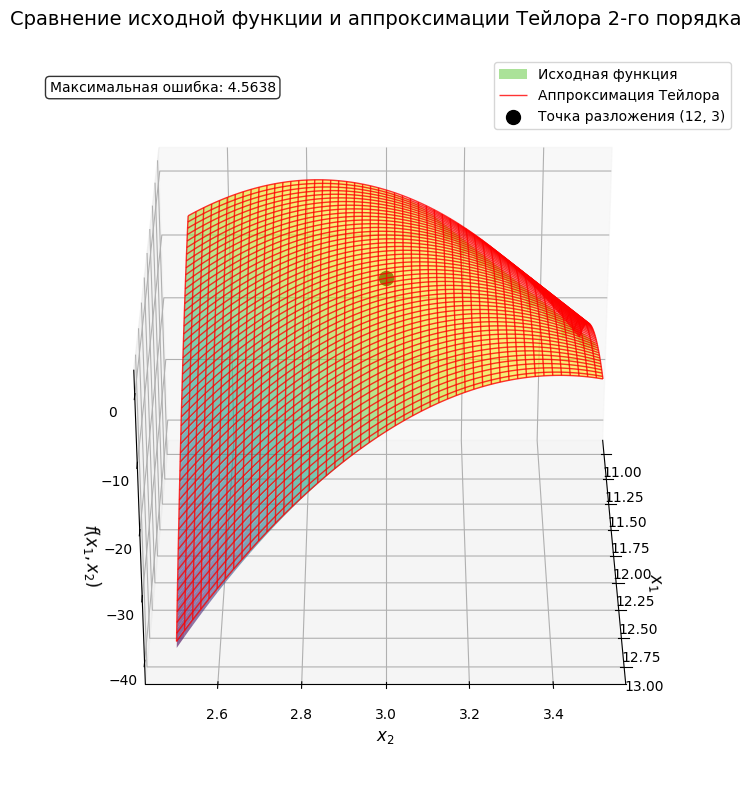

In [6]:
# Создаем сетку вокруг точки (12, 3)
x1_range = np.linspace(11, 13, 200)
x2_range = np.linspace(2.5, 3.5, 200)
X1, X2 = np.meshgrid(x1_range, x2_range)

# Вычисляем значения функций
print("Вычисляем значения функций...")
Z_original = f_2d_np(X1, X2)
Z_taylor = f_taylor_2d_np(X1, X2)

# Создаем фигуру и 3D оси
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Отображаем исходную функцию (полупрозрачная)
print("Создаем визуализацию...")
surf1 = ax.plot_surface(X1, X2, Z_original, cmap='viridis', 
                       alpha=0.6, label='Исходная функция', antialiased=True)

# Отображаем аппроксимацию Тейлора (сетка)
surf2 = ax.plot_wireframe(X1, X2, Z_taylor, color='red', 
                         linewidth=1, label='Аппроксимация Тейлора', alpha=0.8)

# Отмечаем точку разложения
point = ax.scatter([12], [3], [f_2d_np(12, 3)], color='black', s=100, 
                  marker='o', label='Точка разложения (12, 3)')

# Настраиваем график
ax.set_title('Сравнение исходной функции и аппроксимации Тейлора 2-го порядка\n', fontsize=14)
ax.set_xlabel('$x_1$', fontsize=12)
ax.set_ylabel('$x_2$', fontsize=12)
ax.set_zlabel('$f(x_1, x_2)$', fontsize=12)

# Добавляем легенду
ax.legend()

# Добавляем информацию об ошибке
diff = Z_original - Z_taylor
diff = diff[~np.isnan(diff)]
error = np.max(np.abs(diff))
ax.text2D(0.05, 0.95, f'Максимальная ошибка: {error:.4f}', 
          transform=ax.transAxes, fontsize=10,
          bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()

# Функция для анимации вращения
def update(frame):
    ax.view_init(elev=30, azim=frame)
    return fig,

# Создаем анимацию
print("Создаем анимацию...")
frames = np.arange(0, 360, 2)  # Полный оборот с шагом 2 градуса
animation = FuncAnimation(fig, update, frames=frames, interval=50, blit=True)

# Дополнительная информация
print("\n" + "="*50)
print("АНАЛИЗ ТОЧНОСТИ АППРОКСИМАЦИИ:")
print("="*50)
print(f"Диапазон x1: {x1_range[0]:.1f} - {x1_range[-1]:.1f}")
print(f"Диапазон x2: {x2_range[0]:.1f} - {x2_range[-1]:.1f}")
print(f"Максимальная ошибка: {np.max(np.abs(diff)):.6f}")
print(f"Средняя ошибка: {np.mean(np.abs(diff)):.6f}")
print(f"Относительная ошибка: {np.mean(np.abs(diff))/np.mean(np.abs(Z_original[~np.isnan(Z_original)]))*100:.2f}%")

# Сохраняем как видео
print("Сохраняем видео...")
try:
    # Пытаемся использовать ffmpeg
    writer = FFMpegWriter(fps=20, metadata=dict(artist='Matplotlib'), bitrate=1800)
    # animation.save("plot_lab2.mp4", writer=writer)
    print("✅ Видео успешно сохранено как plot.mp4")
    
except ImportError:
    print("FFmpeg не установлен, пробуем альтернативный метод...")
    try:
        # Альтернативный метод
        animation.save("plot_lab2.mp4", fps=20, extra_args=['-vcodec', 'libx264'])
        print("✅ Видео успешно сохранено как plot.mp4")
    except:
        print("❌ Не удалось сохранить видео. Установите ffmpeg:")

## Выводы и анализ результатов

### Качественный анализ аппроксимации:

1. **Точность вблизи точки разложения**: Аппроксимация Тейлора наиболее точна в непосредственной близости от точки $(12, 3)$, что соответствует теоретическим ожиданиям.

2. **Поведение ошибки**: Ошибка аппроксимации возрастает по мере удаления от точки разложения, что характерно для усеченных рядов Тейлора.

3. **Геометрическая интерпретация**: Исходная функция представлена полупрозрачной поверхностью, а аппроксимация - красной сеткой. Их близкое совпадение в окрестности точки разложения демонстрирует эффективность метода.

4. **Практическая значимость**: Векторно-матричный подход позволяет эффективно аппроксимировать многомерные функции, что важно в задачах оптимизации, машинного обучения и физического моделирования.

5. **Степень ряда Тейлора**: Начиная с второй степени полинома апппрокисимирующего данную функцию в данной точке, точность меняется кране незначительно, а сложно вычислений возрастает экспоненциально.

### Ограничения метода:

- Аппроксимация точна только в окрестности точки разложения
- Для функций с большей кривизной может потребоваться больше членов разложения
- Вычисление производных высокого порядка может быть вычислительно сложным для многомерных функций